In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pathlib
import random
import os
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

In [2]:
!git clone https://github.com/DKuzn/Recognition_RusHandRilNet.git

fatal: destination path 'Recognition_RusHandRilNet' already exists and is not an empty directory.


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ALPHABET = 'а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я'.split()
BATCH_SIZE = 1000

In [5]:
data_root_orig_train = '/content/Recognition_RusHandRilNet/Train_dataset'
data_root_train = pathlib.Path(data_root_orig_train)
print(data_root_train)
data_root_orig_test = '/content/Recognition_RusHandRilNet/Test_dataset'
data_root_test = pathlib.Path(data_root_orig_test)
print(data_root_test)

/content/Recognition_RusHandRilNet/Train_dataset
/content/Recognition_RusHandRilNet/Test_dataset


In [6]:
for item in data_root_train.iterdir():
  print(item)

/content/Recognition_RusHandRilNet/Train_dataset/Ц
/content/Recognition_RusHandRilNet/Train_dataset/Е
/content/Recognition_RusHandRilNet/Train_dataset/У
/content/Recognition_RusHandRilNet/Train_dataset/х
/content/Recognition_RusHandRilNet/Train_dataset/Ъ
/content/Recognition_RusHandRilNet/Train_dataset/ё
/content/Recognition_RusHandRilNet/Train_dataset/ж
/content/Recognition_RusHandRilNet/Train_dataset/о
/content/Recognition_RusHandRilNet/Train_dataset/б
/content/Recognition_RusHandRilNet/Train_dataset/а
/content/Recognition_RusHandRilNet/Train_dataset/М
/content/Recognition_RusHandRilNet/Train_dataset/щ
/content/Recognition_RusHandRilNet/Train_dataset/Щ
/content/Recognition_RusHandRilNet/Train_dataset/э
/content/Recognition_RusHandRilNet/Train_dataset/в
/content/Recognition_RusHandRilNet/Train_dataset/н
/content/Recognition_RusHandRilNet/Train_dataset/ы
/content/Recognition_RusHandRilNet/Train_dataset/Д
/content/Recognition_RusHandRilNet/Train_dataset/Ь
/content/Recognition_RusHandRil

In [7]:
for item in data_root_test.iterdir():
  print(item)

/content/Recognition_RusHandRilNet/Test_dataset/Ц
/content/Recognition_RusHandRilNet/Test_dataset/Е
/content/Recognition_RusHandRilNet/Test_dataset/У
/content/Recognition_RusHandRilNet/Test_dataset/х
/content/Recognition_RusHandRilNet/Test_dataset/Ъ
/content/Recognition_RusHandRilNet/Test_dataset/ё
/content/Recognition_RusHandRilNet/Test_dataset/ж
/content/Recognition_RusHandRilNet/Test_dataset/о
/content/Recognition_RusHandRilNet/Test_dataset/б
/content/Recognition_RusHandRilNet/Test_dataset/а
/content/Recognition_RusHandRilNet/Test_dataset/М
/content/Recognition_RusHandRilNet/Test_dataset/щ
/content/Recognition_RusHandRilNet/Test_dataset/Щ
/content/Recognition_RusHandRilNet/Test_dataset/э
/content/Recognition_RusHandRilNet/Test_dataset/в
/content/Recognition_RusHandRilNet/Test_dataset/н
/content/Recognition_RusHandRilNet/Test_dataset/ы
/content/Recognition_RusHandRilNet/Test_dataset/Д
/content/Recognition_RusHandRilNet/Test_dataset/Ь
/content/Recognition_RusHandRilNet/Test_dataset/А


In [8]:
train_image_paths = list(data_root_train.glob('*/*'))
train_image_paths = [str(path) for path in train_image_paths]
random.shuffle(train_image_paths)

image_count = len(train_image_paths)
image_count

66000

In [9]:
test_image_paths = list(data_root_test.glob('*/*'))
test_image_paths = [str(path) for path in test_image_paths]
random.shuffle(test_image_paths)

image_count = len(test_image_paths)
image_count

13200

In [10]:
train_image_paths[:10]

['/content/Recognition_RusHandRilNet/Train_dataset/Щ/54_761.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/Ъ/56_396.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/х/45_730.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/Ч/50_323.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/х/45_765.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/Й/22_554.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/ь/59_509.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/Б/04_608.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/с/37_478.jpg',
 '/content/Recognition_RusHandRilNet/Train_dataset/Ю/64_736.jpg']

In [11]:
test_image_paths[:10]

['/content/Recognition_RusHandRilNet/Test_dataset/ш/51_1137.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/а/01_1194.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/н/29_1193.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/ю/63_1170.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/в/05_1177.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/ь/59_1150.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/Н/30_1069.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/д/09_1195.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/Щ/54_1069.jpg',
 '/content/Recognition_RusHandRilNet/Test_dataset/ж/15_1002.jpg']

In [12]:
def caption_image_train(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root_train)
    return ' - '.join(str(image_rel).split(' - ')[:-1])


In [13]:
def caption_image_test(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root_test)
    return ' - '.join(str(image_rel).split(' - ')[:-1])

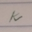

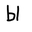

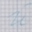

In [14]:
for n in range(3):
    image_path = random.choice(train_image_paths)
    display.display(display.Image(image_path))
    print(caption_image_train(image_path))
    print()

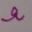

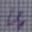

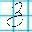

In [15]:
for n in range(3):
    image_path = random.choice(test_image_paths)
    display.display(display.Image(image_path))
    print(caption_image_test(image_path))
    print()

In [16]:
train_label_names = sorted(item.name for item in data_root_train.glob('*/') if item.is_dir())
train_label_names


['Ё',
 'А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'Й',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Ф',
 'Х',
 'Ц',
 'Ч',
 'Ш',
 'Щ',
 'Ъ',
 'Ы',
 'Ь',
 'Э',
 'Ю',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё']

In [17]:
test_label_names = sorted(item.name for item in data_root_test.glob('*/') if item.is_dir())
test_label_names

['Ё',
 'А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'Й',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Ф',
 'Х',
 'Ц',
 'Ч',
 'Ш',
 'Щ',
 'Ъ',
 'Ы',
 'Ь',
 'Э',
 'Ю',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё']

In [18]:
train_label_to_index = dict((name, index) for index, name in enumerate(train_label_names))
train_label_to_index

{'Ё': 0,
 'А': 1,
 'Б': 2,
 'В': 3,
 'Г': 4,
 'Д': 5,
 'Е': 6,
 'Ж': 7,
 'З': 8,
 'И': 9,
 'Й': 10,
 'К': 11,
 'Л': 12,
 'М': 13,
 'Н': 14,
 'О': 15,
 'П': 16,
 'Р': 17,
 'С': 18,
 'Т': 19,
 'У': 20,
 'Ф': 21,
 'Х': 22,
 'Ц': 23,
 'Ч': 24,
 'Ш': 25,
 'Щ': 26,
 'Ъ': 27,
 'Ы': 28,
 'Ь': 29,
 'Э': 30,
 'Ю': 31,
 'Я': 32,
 'а': 33,
 'б': 34,
 'в': 35,
 'г': 36,
 'д': 37,
 'е': 38,
 'ж': 39,
 'з': 40,
 'и': 41,
 'й': 42,
 'к': 43,
 'л': 44,
 'м': 45,
 'н': 46,
 'о': 47,
 'п': 48,
 'р': 49,
 'с': 50,
 'т': 51,
 'у': 52,
 'ф': 53,
 'х': 54,
 'ц': 55,
 'ч': 56,
 'ш': 57,
 'щ': 58,
 'ъ': 59,
 'ы': 60,
 'ь': 61,
 'э': 62,
 'ю': 63,
 'я': 64,
 'ё': 65}

In [19]:
test_label_to_index = dict((name, index) for index, name in enumerate(test_label_names))
test_label_to_index

{'Ё': 0,
 'А': 1,
 'Б': 2,
 'В': 3,
 'Г': 4,
 'Д': 5,
 'Е': 6,
 'Ж': 7,
 'З': 8,
 'И': 9,
 'Й': 10,
 'К': 11,
 'Л': 12,
 'М': 13,
 'Н': 14,
 'О': 15,
 'П': 16,
 'Р': 17,
 'С': 18,
 'Т': 19,
 'У': 20,
 'Ф': 21,
 'Х': 22,
 'Ц': 23,
 'Ч': 24,
 'Ш': 25,
 'Щ': 26,
 'Ъ': 27,
 'Ы': 28,
 'Ь': 29,
 'Э': 30,
 'Ю': 31,
 'Я': 32,
 'а': 33,
 'б': 34,
 'в': 35,
 'г': 36,
 'д': 37,
 'е': 38,
 'ж': 39,
 'з': 40,
 'и': 41,
 'й': 42,
 'к': 43,
 'л': 44,
 'м': 45,
 'н': 46,
 'о': 47,
 'п': 48,
 'р': 49,
 'с': 50,
 'т': 51,
 'у': 52,
 'ф': 53,
 'х': 54,
 'ц': 55,
 'ч': 56,
 'ш': 57,
 'щ': 58,
 'ъ': 59,
 'ы': 60,
 'ь': 61,
 'э': 62,
 'ю': 63,
 'я': 64,
 'ё': 65}

In [20]:
train_image_labels = [train_label_to_index[pathlib.Path(path).parent.name]
                    for path in train_image_paths]

print("First 10 labels indices: ", train_image_labels[:10])

First 10 labels indices:  [26, 27, 54, 24, 54, 10, 61, 2, 50, 31]


In [21]:
test_image_labels = [test_label_to_index[pathlib.Path(path).parent.name]
                    for path in test_image_paths]

print("First 10 labels indices: ", test_image_labels[:10])

First 10 labels indices:  [57, 33, 46, 63, 35, 61, 14, 37, 26, 39]


In [22]:
train_img_path = train_image_paths[0]
train_img_path

'/content/Recognition_RusHandRilNet/Train_dataset/Щ/54_761.jpg'

In [23]:
test_img_path = test_image_paths[0]
test_img_path

'/content/Recognition_RusHandRilNet/Test_dataset/ш/51_1137.jpg'

In [24]:
train_img_raw = tf.io.read_file(train_img_path)
print(repr(train_img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [25]:
test_img_raw = tf.io.read_file(test_img_path)
print(repr(test_img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [26]:
train_img_tensor = tf.image.decode_image(train_img_raw)

print(train_img_tensor.shape)
print(train_img_tensor.dtype)

(32, 32, 3)
<dtype: 'uint8'>


In [27]:
test_img_tensor = tf.image.decode_image(test_img_raw)

print(test_img_tensor.shape)
print(test_img_tensor.dtype)

(32, 32, 3)
<dtype: 'uint8'>


In [28]:
train_img_final = tf.image.resize(train_img_tensor, [32, 32])
train_img_final = train_img_final/255.0
print(train_img_final.shape)
print(train_img_final.numpy().min())
print(train_img_final.numpy().max())

(32, 32, 3)
0.0
1.0


In [29]:
test_img_final = tf.image.resize(test_img_tensor, [32, 32])
test_img_final = test_img_final/255.0
print(test_img_final.shape)
print(test_img_final.numpy().min())
print(test_img_final.numpy().max())

(32, 32, 3)
0.31764707
0.9098039


In [30]:
def preprocess_image(image):
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image /= 255.0  # normalize to [0,1] range

    return image

In [31]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

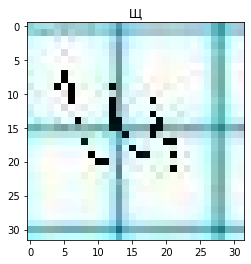

In [32]:
train_image_path = train_image_paths[0]
train_label = train_image_labels[0]

plt.imshow(load_and_preprocess_image(train_image_path))
plt.grid(False)
plt.xlabel(caption_image_train(train_img_path))
plt.title(train_label_names[train_label].title())
print()

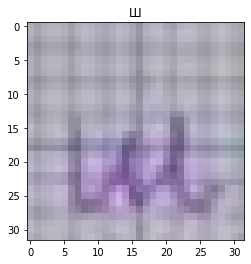

In [33]:
test_image_path = test_image_paths[0]
test_label = test_image_labels[0]

plt.imshow(load_and_preprocess_image(test_image_path))
plt.grid(False)
plt.xlabel(caption_image_test(test_img_path))
plt.title(test_label_names[test_label].title())
print()

In [34]:
train_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
print(train_path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [35]:
test_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
print(test_path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [36]:
train_image_ds = train_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [37]:
test_image_ds = test_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

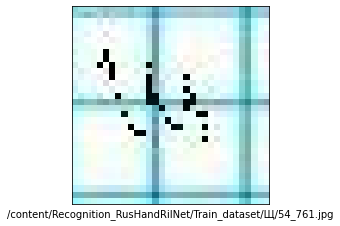

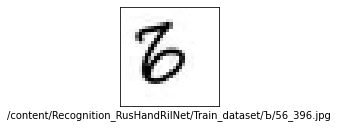

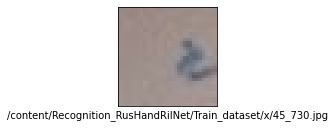

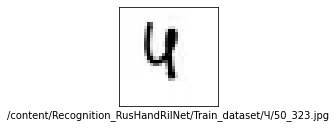

In [38]:
plt.figure(figsize=(8,8))
for n, image in enumerate(train_image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_image_paths[n])
    plt.show()

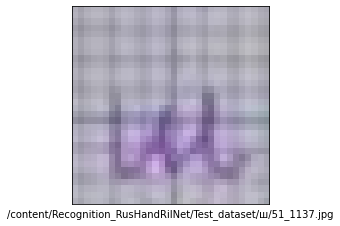

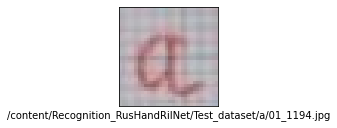

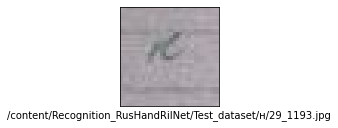

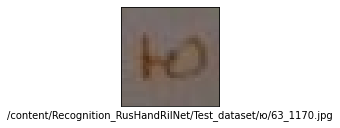

In [39]:
plt.figure(figsize=(8,8))
for n, image in enumerate(test_image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(test_image_paths[n])
    plt.show()

In [40]:
train_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_image_labels, tf.int64))
for label in train_label_ds.take(10):
    print(train_label_names[label.numpy()])

Щ
Ъ
х
Ч
х
Й
ь
Б
с
Ю


In [41]:
test_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(test_image_labels, tf.int64))
for label in test_label_ds.take(10):
    print(test_label_names[label.numpy()])

ш
а
н
ю
в
ь
Н
д
Щ
ж


In [42]:
train_image_label_ds = tf.data.Dataset.zip((train_image_ds, train_label_ds))

In [43]:
test_image_label_ds = tf.data.Dataset.zip((test_image_ds, test_label_ds))

In [44]:
print(train_image_label_ds)

<ZipDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int64)>


In [45]:
print(train_image_label_ds)

<ZipDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int64)>


In [46]:
train_ds = train_image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
train_ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [47]:
test_ds = test_image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
test_ds = test_ds.batch(BATCH_SIZE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)
test_ds

<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [48]:
# Заполнение буфера перемешивания
train_image_batch, train_label_batch = next(iter(train_ds))

In [49]:
test_image_batch, test_label_batch = next(iter(test_ds))

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(66))

In [51]:
train_logit_batch = model(train_image_batch).numpy()

print("min logit:", train_logit_batch.min())
print("max logit:", train_logit_batch.max())
print()

print("Shape:", train_logit_batch.shape)

min logit: -0.18599485
max logit: 0.12768331

Shape: (1000, 66)


In [52]:
test_logit_batch = model(test_image_batch).numpy()

print("min logit:", test_logit_batch.min())
print("max logit:", test_logit_batch.max())
print()

print("Shape:", test_logit_batch.shape)

min logit: -0.16340712
max logit: 0.122756146

Shape: (1000, 66)


In [53]:
len(model.trainable_variables)

16

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
steps_per_epoch=tf.math.ceil(len(train_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

66.0

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(train_ds, epochs=200, steps_per_epoch=66, validation_data=test_ds, validation_steps=10)

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [60]:
model.save('Recognition_RusHandRilNet_new.h5')